In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Loading the data

In [2]:

data = pd.read_csv(r'D:\BA prac\HospitalityProject\guest_interactions.csv')

 Display the first few rows

In [3]:
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,Guest_ID,Interaction_Type,Interaction_Time,Feedback_Score,Room_Number
0,1,Room Service,2024-10-01 10:30:00,4,101
1,2,Concierge Request,2024-10-01 11:15:00,5,102
2,3,Spa Booking,2024-10-01 12:00:00,3,103
3,4,Restaurant Reservation,2024-10-01 13:45:00,5,104
4,5,Room Cleaning,2024-10-01 15:00:00,4,105


Data Exploration and Statistics -> Checking for missing values

In [4]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Guest_ID            0
Interaction_Type    0
Interaction_Time    0
Feedback_Score      0
Room_Number         0
dtype: int64


 Summary statistics of numerical columns

In [5]:
print("\nSummary statistics for numerical columns:")
display(data.describe())


Summary statistics for numerical columns:


,Guest_ID,Feedback_Score,Room_Number
count,5.000000,5.00000,5.000000
mean,3.000000,4.20000,103.000000
std,1.581139,0.83666,1.581139
min,1.000000,3.00000,101.000000
25%,2.000000,4.00000,102.000000
50%,3.000000,4.00000,103.000000
75%,4.000000,5.00000,104.000000
max,5.000000,5.00000,105.000000


Step 4: Data Preprocessing -> converting Feedback_Score to numeric format

In [6]:

data['Feedback_Score'] = pd.to_numeric(data['Feedback_Score'], errors='coerce')

In [7]:
# Split your dataset into features and target variable
X = data['Guest_ID']  
y = data['Feedback_Score']     

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sentiment Analysis Categorization -> Defining conditions for sentiment categories based on Feedback_Score

Step 5: Assuming 'Feedback_Score' as a measure of satisfaction

In [8]:
conditions = [
    (data['Feedback_Score'] >= 4),
    (data['Feedback_Score'] >= 2) & (data['Feedback_Score'] < 4),
    (data['Feedback_Score'] < 2)
]
choices = ['positive', 'neutral', 'negative']

Create a new column 'Sentiment' based on these conditions.

In [9]:
data['Sentiment'] = np.select(conditions, choices)

Display the updated data with 'Sentiment' column.

In [10]:

print("\nDataset with 'Sentiment' category added:")
display(data.head())


Dataset with 'Sentiment' category added:


,Guest_ID,Interaction_Type,Interaction_Time,Feedback_Score,Room_Number,Sentiment
0,1,Room Service,2024-10-01 10:30:00,4,101,positive
1,2,Concierge Request,2024-10-01 11:15:00,5,102,positive
2,3,Spa Booking,2024-10-01 12:00:00,3,103,neutral
3,4,Restaurant Reservation,2024-10-01 13:45:00,5,104,positive
4,5,Room Cleaning,2024-10-01 15:00:00,4,105,positive


 Visualization of Sentiment Distribution

C:\Users\Uncle B\AppData\Local\Temp\ipykernel_20728\1151816704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='cividis')


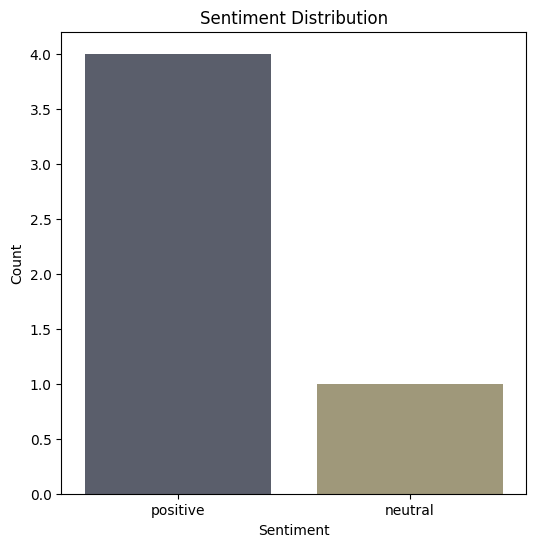

In [11]:

plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Sentiment', palette='cividis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Step 7: Visualizing Feedback Score Distribution per Interaction Type

C:\Users\Uncle B\AppData\Local\Temp\ipykernel_20728\3421584439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Interaction_Type', y='Feedback_Score', palette=custom_palette)
C:\Users\Uncle B\AppData\Local\Temp\ipykernel_20728\3421584439.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=data, x='Interaction_Type', y='Feedback_Score', palette=custom_palette)


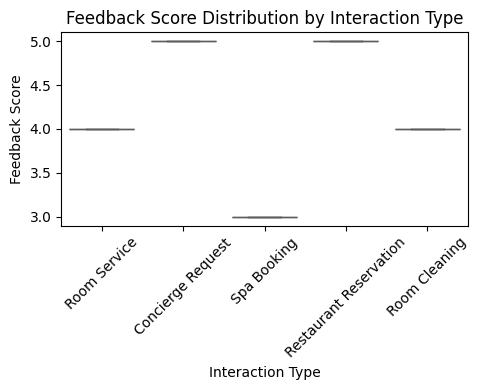

In [17]:
plt.figure(figsize=(5, 4))
custom_palette = ['#FF5733', '#33FF57', '#3357FF']
sns.boxplot(data=data, x='Interaction_Type', y='Feedback_Score', palette=custom_palette)
plt.title('Feedback Score Distribution by Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Feedback Score')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Step 8: Analyze Sample Text Data per Sentiment Categor

In [13]:
print("\nSample of each sentiment type based on Feedback_Score categorization:")

# Positive Reviews
if not data[data['Sentiment'] == 'positive'].empty:
    print("Positive Reviews:")
    print(data[data['Sentiment'] == 'positive'].sample(3, replace=True)['Interaction_Type'].values)
else:
    print("No Positive Reviews available.")

# Neutral Reviews
if not data[data['Sentiment'] == 'neutral'].empty:
    print("\nNeutral Reviews:")
    print(data[data['Sentiment'] == 'neutral'].sample(2, replace=True)['Interaction_Type'].values)
else:
    print("No Neutral Reviews available.")

# Negative Reviews
if not data[data['Sentiment'] == 'negative'].empty:
    print("\nNegative Reviews:")
    print(data[data['Sentiment'] == 'negative'].sample(2, replace=True)['Interaction_Type'].values)
else:
    print("No Negative Reviews available.")



Sample of each sentiment type based on Feedback_Score categorization:
Positive Reviews:
['Restaurant Reservation' 'Room Cleaning' 'Concierge Request']

Neutral Reviews:
['Spa Booking' 'Spa Booking']
No Negative Reviews available.


Step 9: Summary of Interaction Type Frequencies

In [14]:
interaction_type_counts = data['Interaction_Type'].value_counts()
print("\nFrequency of each Interaction Type:")
print(interaction_type_counts)


Frequency of each Interaction Type:
Interaction_Type
Room Service              1
Concierge Request         1
Spa Booking               1
Restaurant Reservation    1
Room Cleaning             1
Name: count, dtype: int64


Plot Interaction Type Frequencies

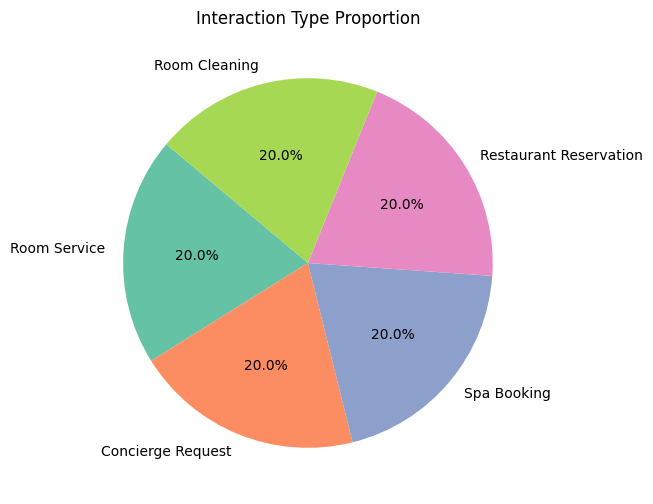

In [15]:
plt.figure(figsize=(8, 6))
interaction_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.ylabel('')
plt.title('Interaction Type Proportion')
plt.show()

In [16]:
conclusion = """
Conclusion: This data is crucial for training AI models aimed at improving guest satisfaction 
and operational efficiency in the hospitality industry. Reviews, booking patterns, and 
satisfaction scores enable tailored services and proactive guest engagement.
"""
print(conclusion)


Conclusion: This data is crucial for training AI models aimed at improving guest satisfaction 
and operational efficiency in the hospitality industry. Reviews, booking patterns, and 
satisfaction scores enable tailored services and proactive guest engagement.

